In [4]:
%qtconsole

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, TextBox
%matplotlib qt

# Curvas de decaimiento radiactivo dinamicas

### Decaimiento radiactivo:
\begin{equation*}
\large
N(t)   =  N(0)*e^{-\lambda t}
\end{equation*}

### Periodo de Semidesintegración:
\begin{equation*}
\large
T_{1/2}   =  ln(2)/{\lambda}
\end{equation*}

### Mover el slider para cambiar el Tau e ingresar N (cantidad de particulas radiactivas)

C:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


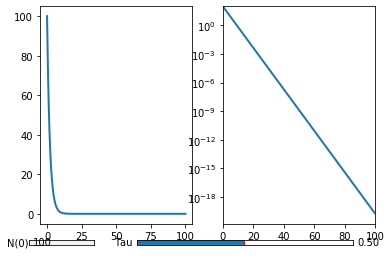

In [2]:
N_cero = 100
t_max = 100

fig, ax = plt.subplots(1,2)

t = np.arange(0.0, t_max, 0.001)
initial_tau = 0.5
porc = N_cero*np.exp((-1)*initial_tau*t) 
#l, = plt.plot(t, porc, lw=2)
#Grafico lineal
l, = ax[0].plot(t, porc, lw=2)
#Grafico semilog-x
ax[1].semilogy() 
llog, = ax[1].plot(t, porc, lw=2)

initial_text = str(N_cero)

#print(t)
#print(porc)
ax[0] = plt.axis([0,t_max,0,N_cero])
ax[1] = plt.axis([0,t_max,0,N_cero]) #

axtau = plt.axes([0.35, .05, 0.50, 0.02])
# Slider
stau = Slider(axtau, 'Tau', 0.01, 1, valinit=initial_tau)

axbox = plt.axes([0.10, .05, 0.15, 0.02])
text_box = TextBox(axbox, 'N(0)', initial=initial_text)


#Funcion para modificar el tau de la curva
def update(val):
    # tau is the current value of the slider
    tau = stau.val
    #textInput es el valor actual del TextBox 
    textInput = float(text_box.text)
    #print(textInput)
    # update curve
    l.set_ydata(textInput*np.exp((-1)*tau*t))
    llog.set_ydata(textInput*np.exp((-1)*tau*t))
    # redraw canvas while idle
    fig.canvas.draw_idle()
    
#Funcion para modificar el N inicial
def submit(text):
    
    #textInput es el valor actual del TextBox 
    textInput = eval(text)
    # tau is the current value of the slider
    tau = stau.val
    
    #Actualizo curva
    l.set_ydata(textInput*np.exp((-1)*tau*t))
    llog.set_ydata(textInput*np.exp((-1)*tau*t))
    l.set_ylim(0, textInput)
    
    fig.canvas.draw_idle()
    
# call update function on slider value change
stau.on_changed(update)

# funcion para levantar los datos del TextBox
text_box.on_submit(submit)

plt.show()

# Animacion decaimiento Radiactivo: particulas y curvas

In [22]:
x_data = []
y_dataLin = []
y_dataLog = []

N_cero = 100

T_semi = (6.02*3600)
initial_tau = np.log(2)/T_semi
t_max = 5*T_semi #5 periodos de semidesintegracion

print("El T1/2 {} es y el tau {}".format(T_semi, initial_tau))

fig, ax = plt.subplots(1,3)

#Grafico lineal
ax[1].set_xlim(0,t_max)
ax[1].set_ylim(0,N_cero)
ax[1].grid(True,which='both')
ax[1].set_xticks(np.arange(0,t_max,T_semi))
ax[1].set_xticklabels(['0','T1/2','2*T1/2','2*T1/2','4*T1/2'])
lineLineal, = ax[1].plot(0,N_cero, lw=2)


#Grafico semilog-x
ax[2].semilogy() 
ax[2].set_xlim(0,t_max)
ax[2].set_ylim(0.1,N_cero)
ax[2].grid(True,which='both')
ax[2].set_xticks(np.arange(0,t_max,T_semi))
ax[2].set_xticklabels(['0','T1/2','2*T1/2','2*T1/2','4*T1/2'])
lineLog, = ax[2].plot(0, N_cero, lw=2)

#Genero puntos aleatorios x,y
min = 0
max = 1
cantParticles = 500
rng = np.random.default_rng()

particles = np.zeros(cantParticles, dtype=[('xpos', float, 1),
                                           ('ypos', float, 1),
                                           ('color', float, 4)])
particles['xpos'] = rng.random((cantParticles,))
particles['ypos'] = rng.random((cantParticles,))
particles['color'][:,:]=[1,0,0,0] #incialmente son todas de color rojo

#xpos = rng.random((cantParticles,))
#ypos = rng.random((cantParticles,))
ax[0].set_xlim(min,max)
ax[0].set_ylim(min,max)
particlesPlot = ax[0].scatter(particles['xpos'],particles['ypos'],c=particles['color'][:,0:3]) #

def animation_frame(i):
    x_data.append(i)
    new_y = N_cero*np.exp((-1)*initial_tau*i)
    y_dataLin.append(new_y)
    y_dataLog.append(new_y)
    
    lineLineal.set_xdata(x_data)
    lineLineal.set_ydata(y_dataLin)
    lineLog.set_xdata(x_data)
    lineLog.set_ydata(y_dataLog)
    
    particles['color'][0:int(np.rint(cantParticles*(1-new_y/100))),:]=[0,0,1,0]
    particlesPlot = ax[0].scatter(particles['xpos'],particles['ypos'],
                                  c=particles['color'][:,0:3])

    return lineLineal,lineLog,

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0,t_max+1,int(np.rint(T_semi/4))), interval=1)
plt.show()
    

El T1/2 21672.0 es y el tau 3.1983535463268054e-05


C:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


# Animacion lluvia de Ejemplo

In [36]:
# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:,0], rain_drops['position'][:,1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:,3] = np.clip(rain_drops['color'][:,3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

C:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  if sys.path[0] == '':
